# Data Validation / Outliers Analysis

As stated in the specs, data is not clean, we need to perform a validation step. One way that we will adapt is to perform validatiobn by series. In which we will factorize each series values and inspect for typos, invalid, ...etc
And we will perform this on the final ABT we construted in **0_data_preparation** notebook

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline  

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df_abt = pd.read_csv("../specs/clean/Model Build - AbastractBaseTable.csv", encoding='latin-1', index_col=False)
df_abt.head(5)

ClientID  Age Gender    County     IncomeGroup HeldLoanPreviously  \
0         1   36      1      Cork   10001 - 40000                  1   
1         2   43      1     Cavan       0 - 10000                  0   
2         3   32      0    Dublin   10001 - 40000                  0   
3         4   52      1     Louth   40001 - 60000                  1   
4         5   63      0  Kilkenny  60001 - 100000                  0   

  NumberOfProductsInbank  AverageTXNAmount  NumTransactions  LastTXNAmount  \
0                      4            58.000              0.0            NaN   
1                      4             2.663             17.0          83.66   
2                      2            46.000             25.0         526.18   
3                      2             0.000             13.0          70.68   
4                      1           126.000             39.0         259.07   

   MerchantCode                  LastTransactionNarrative  LoanFlag  
0           NaN                                       NaN         0  
1        7211.0     THE BRIDGE LAUNDRY       WICKLOW TOWN         0  
2        3667.0  LUXOR HOTEL/CASINO       LAS VEGAS    NV         0  
3        5712.0     HARVEY NORMAN            CARRICKMINES         0  
4        5999.0      PAYPAL *PETEWOODWAR      35314369001         0

## Age Attribute

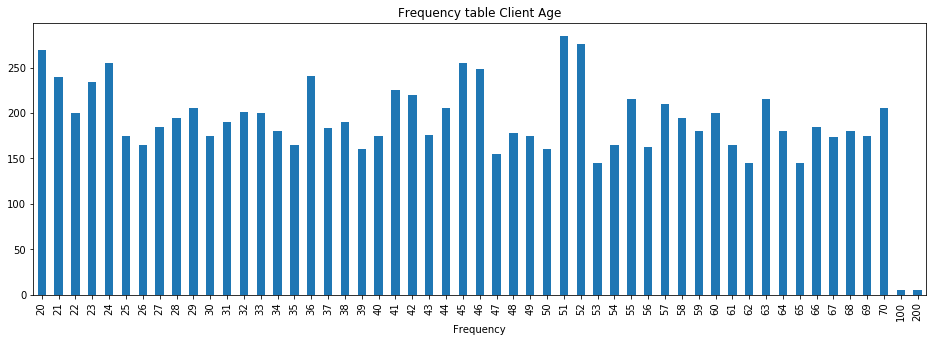

In [3]:
plt.figure(figsize=(16, 5))
plt.xlabel("Age")
plt.xlabel("Frequency")

df_abt.Age.value_counts().sort_index().plot.bar(title="Frequency table Client Age");

As we can see data is almost uniform with the age (as expected), but with two major **outliers**

**Age 100**: Its is plausible for centenarians they do have account with BOI. Ref: https://www.irishtimes.com/news/social-affairs/award-for-407-people-who-were-100-last-year-from-president-1.2055829 Ireland has 407 people that are +100 of age, we can assume those are real data points.

**Age 200**: We definitly have inconsistance datum here, and in this case we should consult our ETL process, and engage **Personal Account Departments** for veryfying and validating entry records.

*Aside: As we are treating date point of people of age 100 not an outlier the sharpe fall of age from 70 -> 100 raise a question of the data collection method*

**Conclusion**
We are going to remove entries of clients who score age 200 from out ABT

In [4]:
"To be removed"
df_abt[df_abt.Age > 100]
df_abt = df_abt[df_abt.Age <= 100]

'To be removed'

ClientID  Age Gender     County     IncomeGroup HeldLoanPreviously  \
1893      1897  200      1  Waterford   10001 - 40000                  1   
3889      3895  200      1       Cork  60001 - 100000                  1   
5889      5895  200      1     Dublin         100000+                  1   
7889      7895  200      1       Cork   10001 - 40000                  0   
9889      9895  200      1     Dublin  60001 - 100000                  1   

     NumberOfProductsInbank  AverageTXNAmount  NumTransactions  LastTXNAmount  \
1893                      4             0.000             67.0         868.41   
3889                      2             0.000             14.0         370.62   
5889                      2             2.753             18.0          30.10   
7889                      2            10.000              0.0            NaN   
9889                      5           333.000              8.0         360.88   

      MerchantCode                  LastTransactionNarrative  LoanFlag  
1893        5960.0           CHILL INSURANCE          DUBLIN         1  
3889        3726.0  RIO SUITES ADVANCE DEP   866-209-4732 NV         0  
5889        3602.0  HUDSON HOTEL             NEW YORK     NY         1  
7889           NaN                                       NaN         0  
9889        3174.0  JETBLUE     2792149891791SALT LAKE CTYUT         0

## Gender Attribute

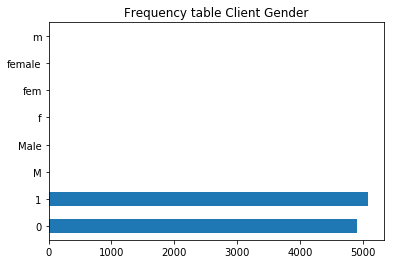

In [5]:
df_abt.Gender.value_counts().sort_index().plot.barh(title="Frequency table Client Gender");

As we can see Gender flag has discrapancy, we need to unify the "Male" or "Female" across the ABT dataframe

In [6]:
df_abt.Gender.replace('1',"Female", inplace=True)
df_abt.Gender.replace('f',"Female", inplace=True)
df_abt.Gender.replace('fem',"Female", inplace=True)
df_abt.Gender.replace('female',"Female", inplace=True)

df_abt.Gender.replace('0',"Male", inplace=True)
df_abt.Gender.replace('M',"Male", inplace=True)
df_abt.Gender.replace('m',"Male", inplace=True)

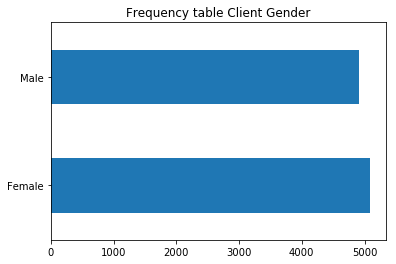

In [7]:
df_abt.Gender.value_counts().sort_index().plot.barh(title="Frequency table Client Gender");

## County Attribute

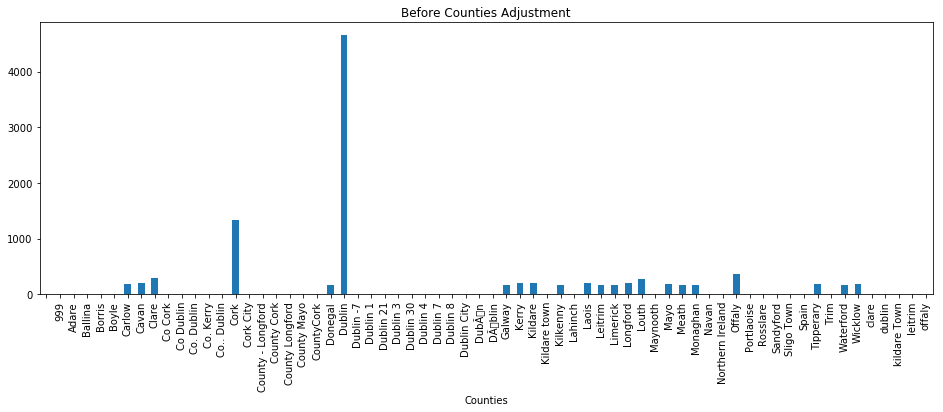

In [8]:
plt.figure(figsize=(16, 5))
plt.xlabel("Counties")

df_abt.County.value_counts().sort_index().plot.bar(title="Before Counties Adjustment");

Inspecting invalid Counties, as we can see there are a mix between cities, Dublin zip areas and even ports.
In this case we need to form a mapping for all invalid location, for a matter of time constraint a lookup dictionary is sufficient to carry out this validation
other complex search methods like full Ireland location database or even google location api service.

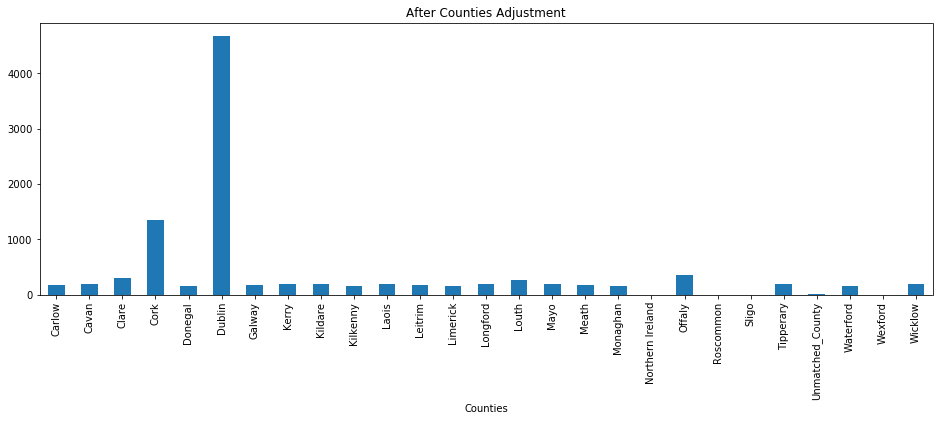

In [9]:
irl_location_db = {
    'Dublin': ['DÃ\x9bblin', "Sandyford", "DubÃ\x9dn"],
    'Antrim': [],
    'Down': [],
    'Cork': [],
    'Galway': [],
    'Londonderry': [],
    'Kildare': ["Maynooth"],
    'Limerick': ["Adare"],
    'Meath': ["Navan", "Trim"],
    'Tyrone': [],
    'Armagh': [],
    'Donegal': [],
    'Tipperary': [],
    'Kerry': [],
    'Wexford': ["Rosslare"],
    'Wicklow': [],
    'Mayo': ["Ballina"],
    'Louth': [],
    'Clare': ["Lahinch"],
    'Waterford': [],
    'Kilkenny': [],
    'Westmeath': [],
    'Laois': [],
    'Offaly': [],
    'Cavan': [],
    'Sligo': [],
    'Roscommon': ["Boyle"],
    'Fermanagh': [],
    'Monaghan': [],
    'Carlow': ["Borris"],
    'Longford': [],
    'Leitrim': [],
    'Northern Ireland' : []
}

invalid_county = set()
unmatched_county = set()

def uniformalize_name(raw, lookup_table):
    for key, value in lookup_table.items():
        if re.search(key, str(raw), re.IGNORECASE):
            return key

    invalid_county.add(str(raw))

    for key, value in lookup_table.items():
        if str(raw) in value:
            return key
        
    unmatched_county.add(str(raw))
    return "Unmatched_County"

df_abt['County'] = df_abt['County'].apply(func=uniformalize_name, lookup_table=irl_location_db)

plt.figure(figsize=(16, 5))
plt.xlabel("Counties")
df_abt.County.value_counts().sort_index().plot.bar(title="After Counties Adjustment");

In [10]:
print("Invalid Counties : " + str(invalid_county))
print()
print("Unmatched County : " + str(unmatched_county))

Invalid Counties : {'DubÃ\x9dn', 'nan', 'Maynooth', 'Rosslare', 'Navan', 'Ballina', 'Spain', 'Boyle', 'Borris', 'DÃ\x9bblin', 'Trim', 'Lahinch', 'Sandyford', 'Adare', ' ', '999'}

Unmatched County : {'nan', '999', ' ', 'Spain'}


Final step is to remove all unmatched counties entries, and as before we need to review the ETL process and/or engage the personal account department for review the invalid data.

In [11]:
df_abt = df_abt[df_abt.County != "Unmatched_County"]
df_abt.County.value_counts()

Dublin              4676
Cork                1340
Offaly               355
Clare                297
Louth                264
Kildare              199
Longford             199
Laois                196
Kerry                193
Cavan                192
Tipperary            189
Mayo                 189
Wicklow              188
Carlow               182
Galway               172
Leitrim              167
Meath                167
Monaghan             164
Limerick             164
Waterford            164
Kilkenny             161
Donegal              161
Roscommon              1
Wexford                1
Sligo                  1
Northern Ireland       1
Name: County, dtype: int64

## IncomeGroup Attribute

In [12]:
df_abt.IncomeGroup.value_counts()

10001 - 40000     5572
60001 - 100000    1730
40001 - 60000     1174
100000+           1133
0 - 10000          369
10001 ? 40000        2
10001 ?. 40000       1
0  ? 10000           1
10002 - 40000        1
Name: IncomeGroup, dtype: int64

As we see some IncomeGroup values are invalid 

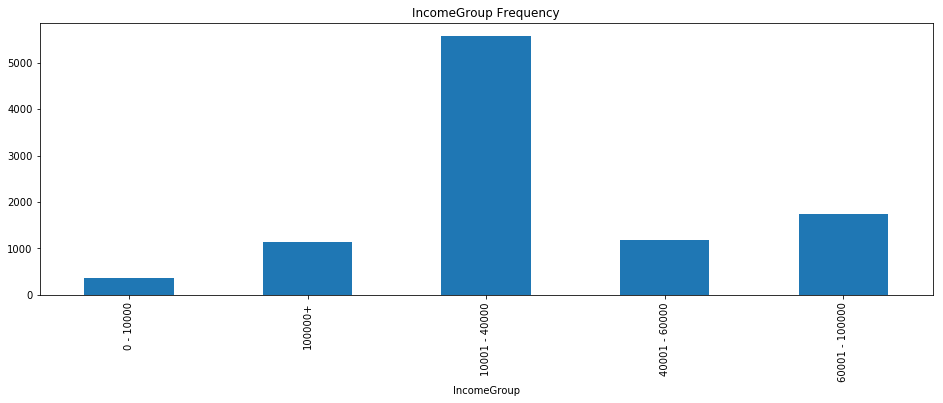

In [13]:
df_abt.IncomeGroup.replace('0  ? 10000',"0 - 10000", inplace=True)
df_abt.IncomeGroup.replace('10001 ? 40000',"10001 - 40000", inplace=True)
df_abt.IncomeGroup.replace('10001 ?. 40000',"10001 - 40000", inplace=True)
df_abt.IncomeGroup.replace('10002 - 40000',"10001 - 40000", inplace=True)

plt.figure(figsize=(16, 5))
plt.xlabel("IncomeGroup")
df_abt.IncomeGroup.value_counts().sort_index().plot.bar(title="IncomeGroup Frequency");

## NumberOfProductsInbank Attribute



In [14]:
df_abt.NumberOfProductsInbank.value_counts()

3     2015
2     2005
4     2002
5     1988
1     1967
-1       4
         1
-2       1
Name: NumberOfProductsInbank, dtype: int64

As we see some NumberOfProductsInbank values are invalid. In this case we can't spaculate the original values of the -ve or empty AND they are insignificant compared to the reset of the dataset. Therefore we would exclude them from the dataset.

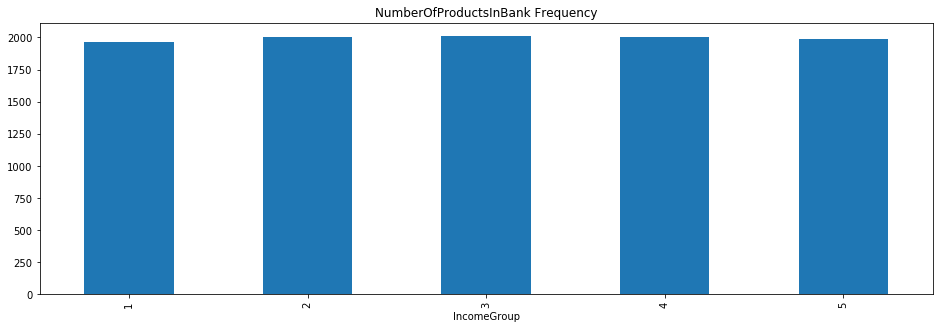

In [15]:
df_abt = df_abt[df_abt.NumberOfProductsInbank != '-1']
df_abt = df_abt[df_abt.NumberOfProductsInbank != '-2']
df_abt = df_abt[df_abt.NumberOfProductsInbank != ' ']


plt.figure(figsize=(16, 5))
plt.xlabel("IncomeGroup")
df_abt.NumberOfProductsInbank.value_counts().sort_index().plot.bar(title="NumberOfProductsInBank Frequency");

## AverageTXNAmount Attribute

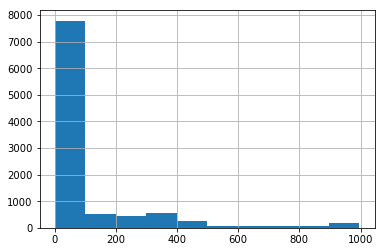

In [16]:
df_abt.AverageTXNAmount.hist();

## HeldLoanPreviously

In [17]:
df_abt.HeldLoanPreviously.value_counts()

0          7483
1          2489
Â³            4
 Â-          1
Name: HeldLoanPreviously, dtype: int64

We have non-ascii characters as a result we will follow a conservative approch of removing the entries from the dataset

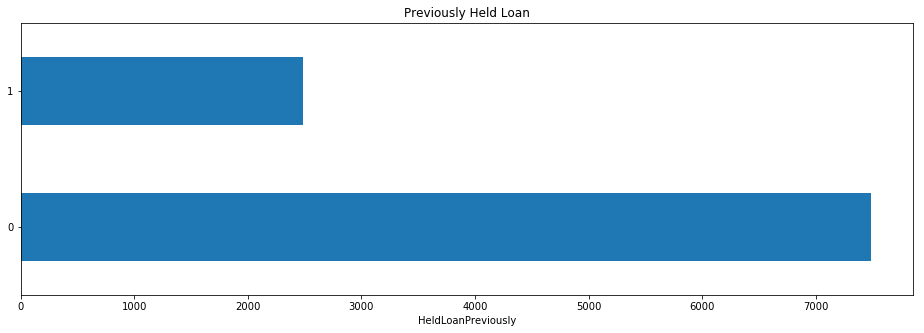

In [18]:
df_abt['HeldLoanPreviously'] = df_abt['HeldLoanPreviously'].map({'0': 0, '1': 1}).fillna(-1).astype(int)
df_abt = df_abt[df_abt.HeldLoanPreviously != -1]
df_abt.HeldLoanPreviously.value_counts()

plt.figure(figsize=(16, 5))
plt.xlabel("HeldLoanPreviously")
df_abt.HeldLoanPreviously.value_counts().plot.barh(title="Previously Held Loan");

## NumTransactions Attribute

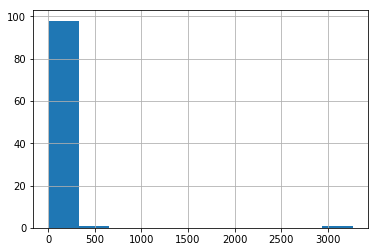

In [19]:
df_abt.NumTransactions.value_counts().hist()

## LastTXNAmount

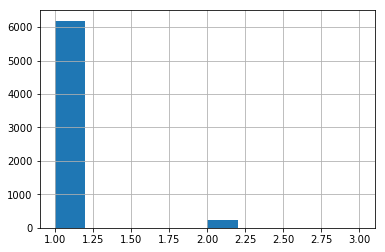

In [20]:
df_abt.LastTXNAmount.value_counts().hist();

## MerchantCode

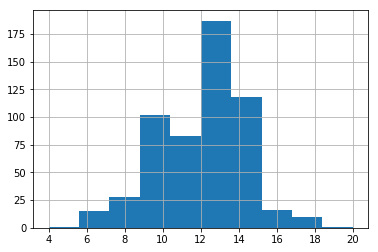

In [21]:
df_abt.MerchantCode.value_counts().hist();

## LoanFlag Attribute

In [22]:
df_abt.LoanFlag.value_counts()

0    9763
1     209
Name: LoanFlag, dtype: int64

In [23]:
pd.DataFrame.to_csv(df_abt, "../specs/clean/Model Build - AbastractBaseTable - Validated.csv", encoding='utf-8', index=False)